<a href="https://colab.research.google.com/github/iRahulPandey/medium-articles/blob/master/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

The notebook shows various ways of visualizing amazing data
- Matplotlib
- Seaborn
- Plotly Express
- bqplot
- altair
- bokeh

## Import libraries

In [1]:
# install
!pip install colorama
!pip install pycountry
!pip install pycountry-convert
!pip install oscovida
!pip install --upgrade plotly
!pip install bqplot
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
from datetime import date, datetime, timedelta
from colorama import Fore, Back, Style
import pycountry
import pycountry_convert as pc
import oscovida as ov
import folium
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bqplot import DateScale, LinearScale, Lines, Axis, Figure

     |████████████████████████████████| 10.1MB 3.9MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=23b53ff23971bdba1a5065ae72d6924f67320c3abe21d10b7bd4037b50bacb58
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 245kB 4.1MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-mock 3.6.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.12.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1


     |████████████████████████████████| 13.2MB 3.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 1.2MB 3.9MB/s 


## Get Data

In [2]:
# get the previous day to fetch data from for latest data and us_medical_data
today = date.today()
latest_data = today-timedelta(days = 1)

# generate url
latest_data_url = 'https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+latest_data.strftime("%m-%d-%Y")+'.csv'
us_medical_data_url = 'https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+latest_data.strftime("%m-%d-%Y")+'.csv'

In [3]:
# Get data from Center for Systems Science and Engineering (CSSE)
# https://github.com/CSSEGISandData/COVID-19
# confirmed cases
confirmed_cases = pd.read_csv('https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
# recoveries
recoveries= pd.read_csv('https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
# deaths
deaths = pd.read_csv('https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# current data
latest_data = pd.read_csv(latest_data_url)
# us medical data
us_medical_data = pd.read_csv(us_medical_data_url)
# vaccination manufacturer
vaccine_manufacturer = pd.read_csv('https://raw.github.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv')
# vaccination manufacturer
vaccine = pd.read_csv('https://raw.github.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
# get incidence for different countries
cases_incidence, deaths_incidence = ov.get_incidence_rates_countries()

Downloaded data: last data point 6/2/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 6/2/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [4]:
# show confirmed data
confirmed_cases.head(n=2)

Province/State Country/Region       Lat  ...  5/31/21  6/1/21  6/2/21
0            NaN    Afghanistan  33.93911  ...    71838   72977   74026
1            NaN        Albania  41.15330  ...   132315  132337  132351

[2 rows x 502 columns]

## Missing Data

In [5]:
# missing data without visualization in percentage
confirmed_cases[['Province/State','Country/Region','Lat','Long']].isnull().sum()/len(confirmed_cases)*100

Province/State    68.840580
Country/Region     0.000000
Lat                0.724638
Long               0.724638
dtype: float64

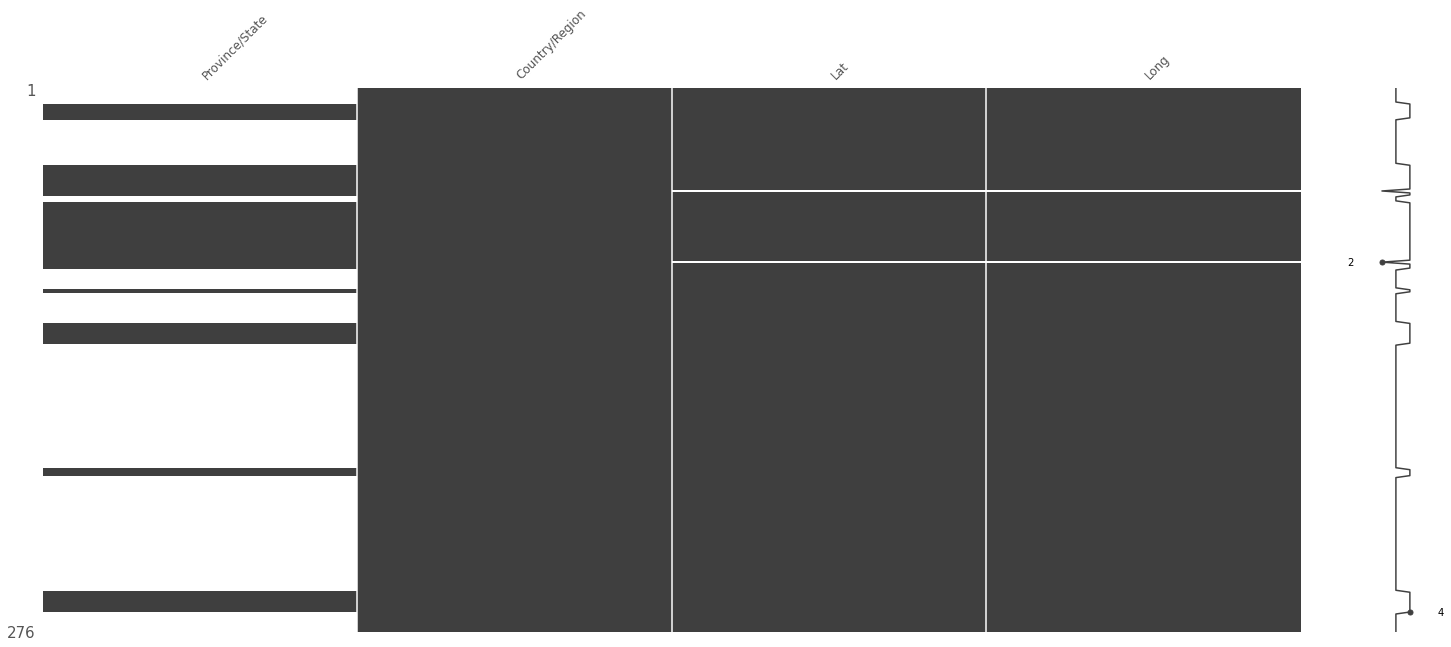

In [6]:
# list for visualization
columns = ['Province/State','Country/Region','Lat','Long']

# visualize missing data
msno.matrix(confirmed_cases[columns], fontsize=12);

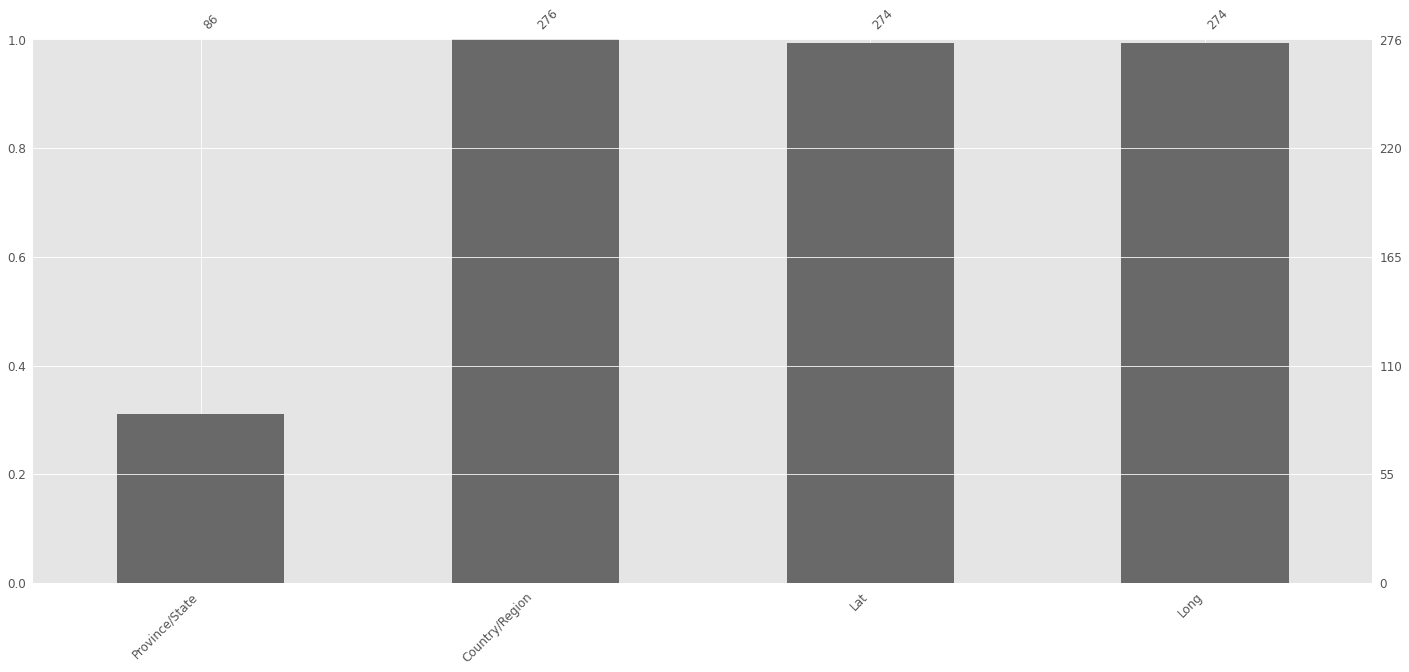

In [7]:
# visualize histogram 
msno.bar(confirmed_cases[columns], fontsize=12);

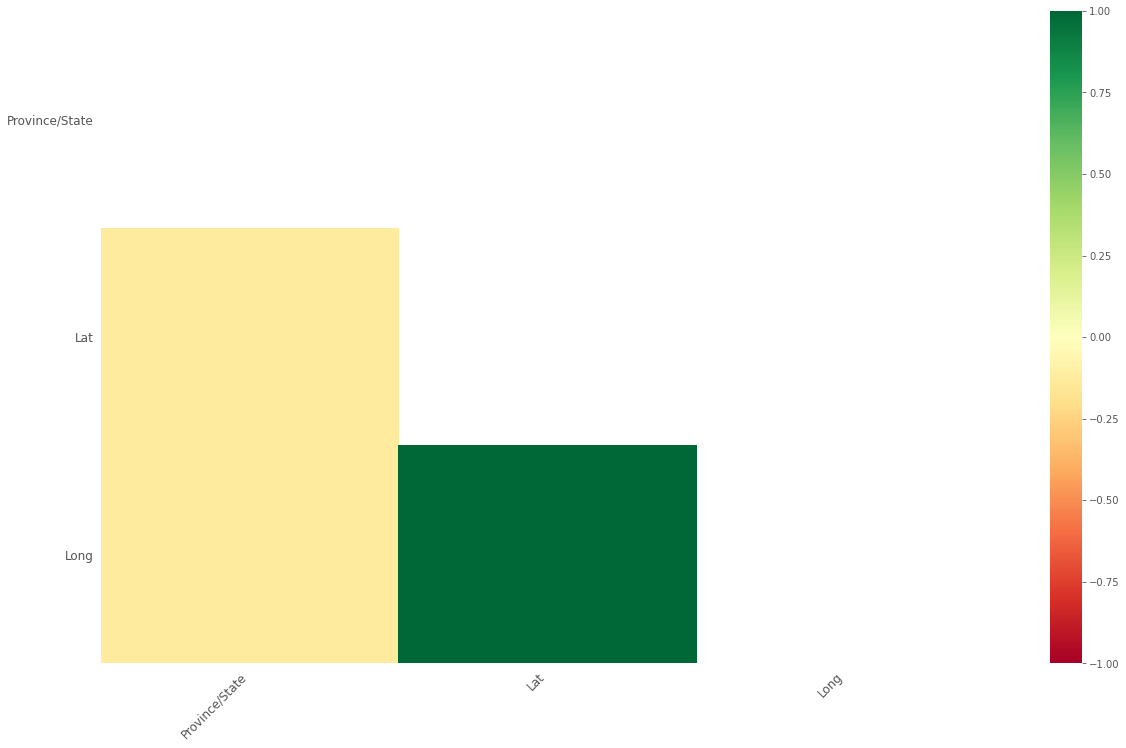

In [8]:
msno.heatmap(confirmed_cases[columns], fontsize=12, cmap="RdYlGn",labels=False);

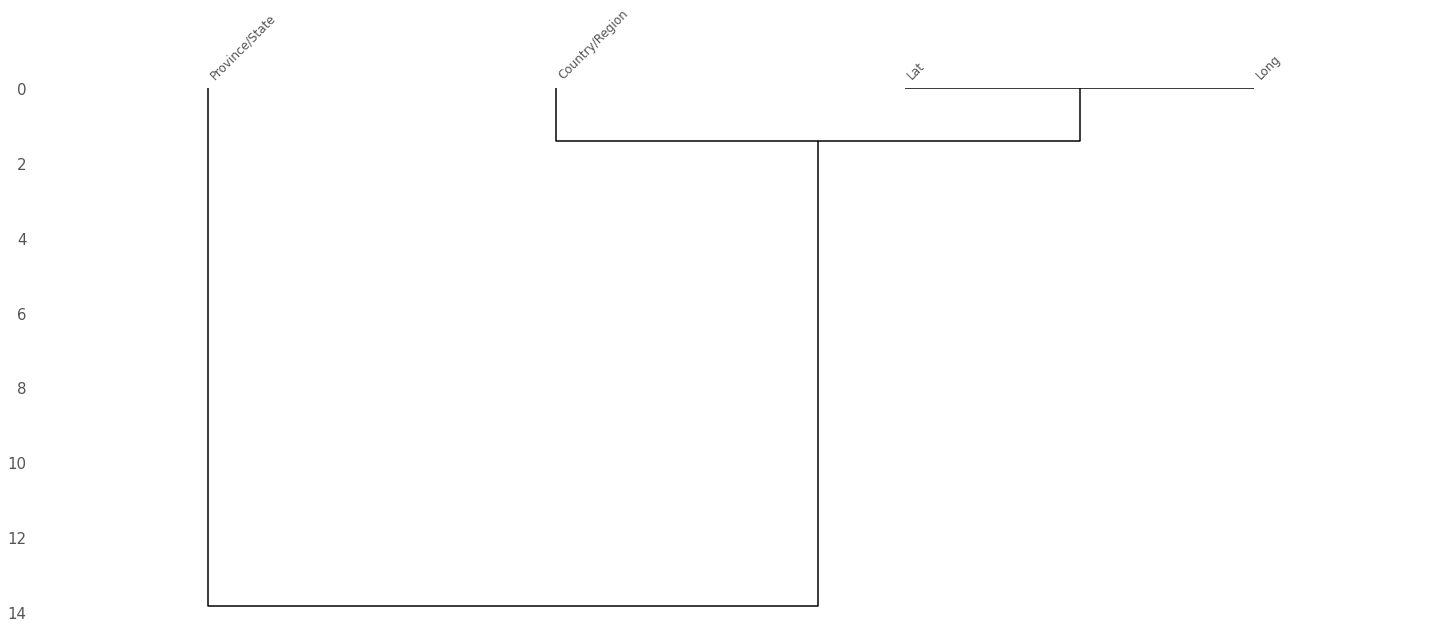

In [9]:
msno.dendrogram(confirmed_cases[columns], fontsize=12);

## Data Transformation

#### Merge Data

In [10]:
# melt data
melted_confirmed_df = confirmed_cases.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name=['Date'], 
        value_name='Confirmed_Cases')

melted_deaths_df = deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name=['Date'], 
        value_name='Deaths')

In [11]:
melted_confirmed_df.isnull().sum()/len(melted_confirmed_df)*100

Province/State     68.840580
Country/Region      0.000000
Lat                 0.724638
Long                0.724638
Date                0.000000
Confirmed_Cases     0.000000
dtype: float64

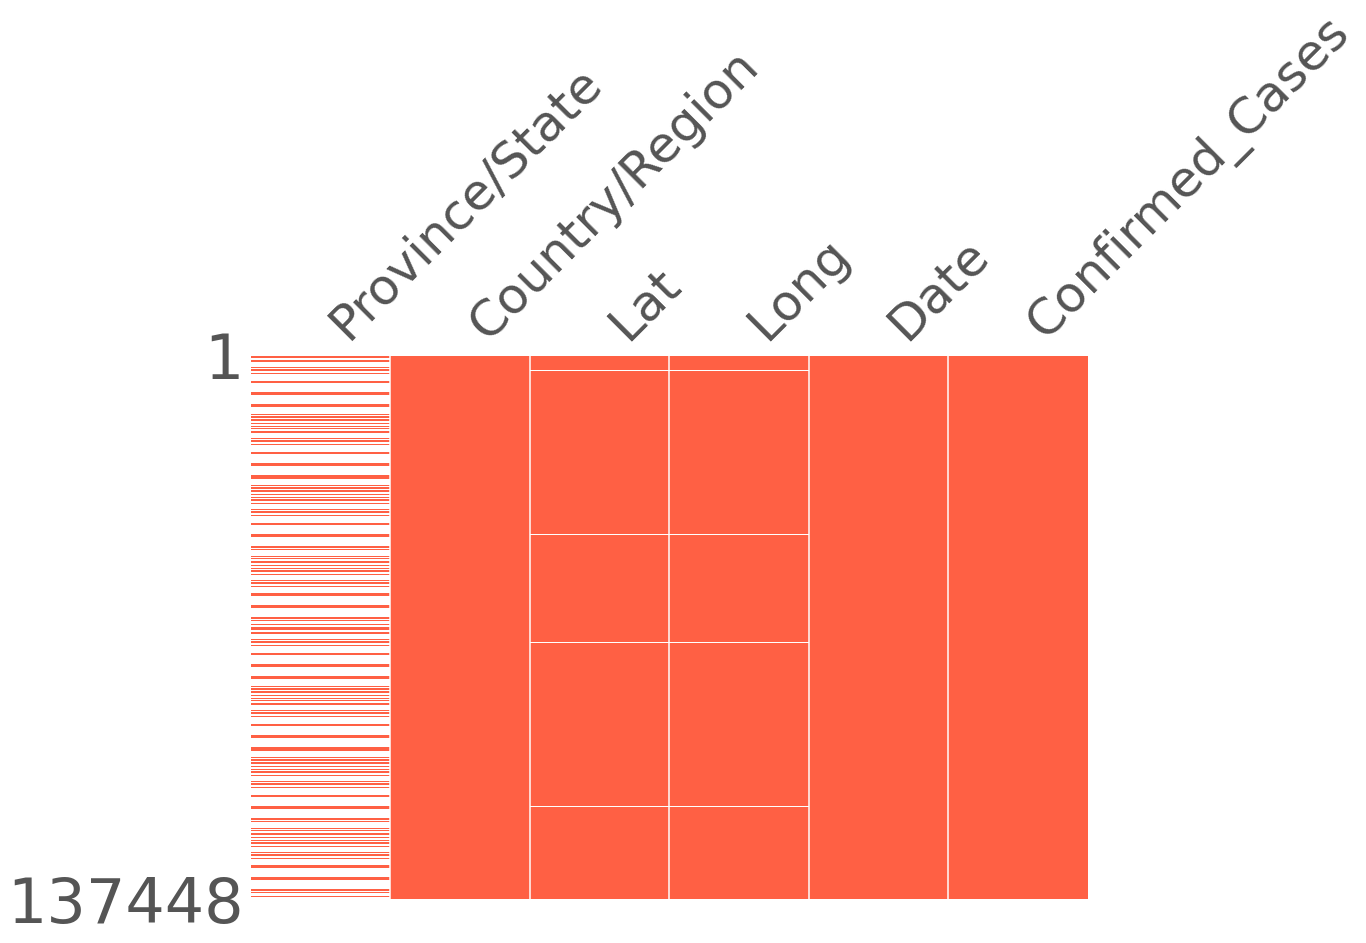

In [12]:
# visualize missing data
msno.matrix(melted_confirmed_df, fontsize=50, figsize=(15,10),sparkline=False, color=(1, 0.38, 0.27),);

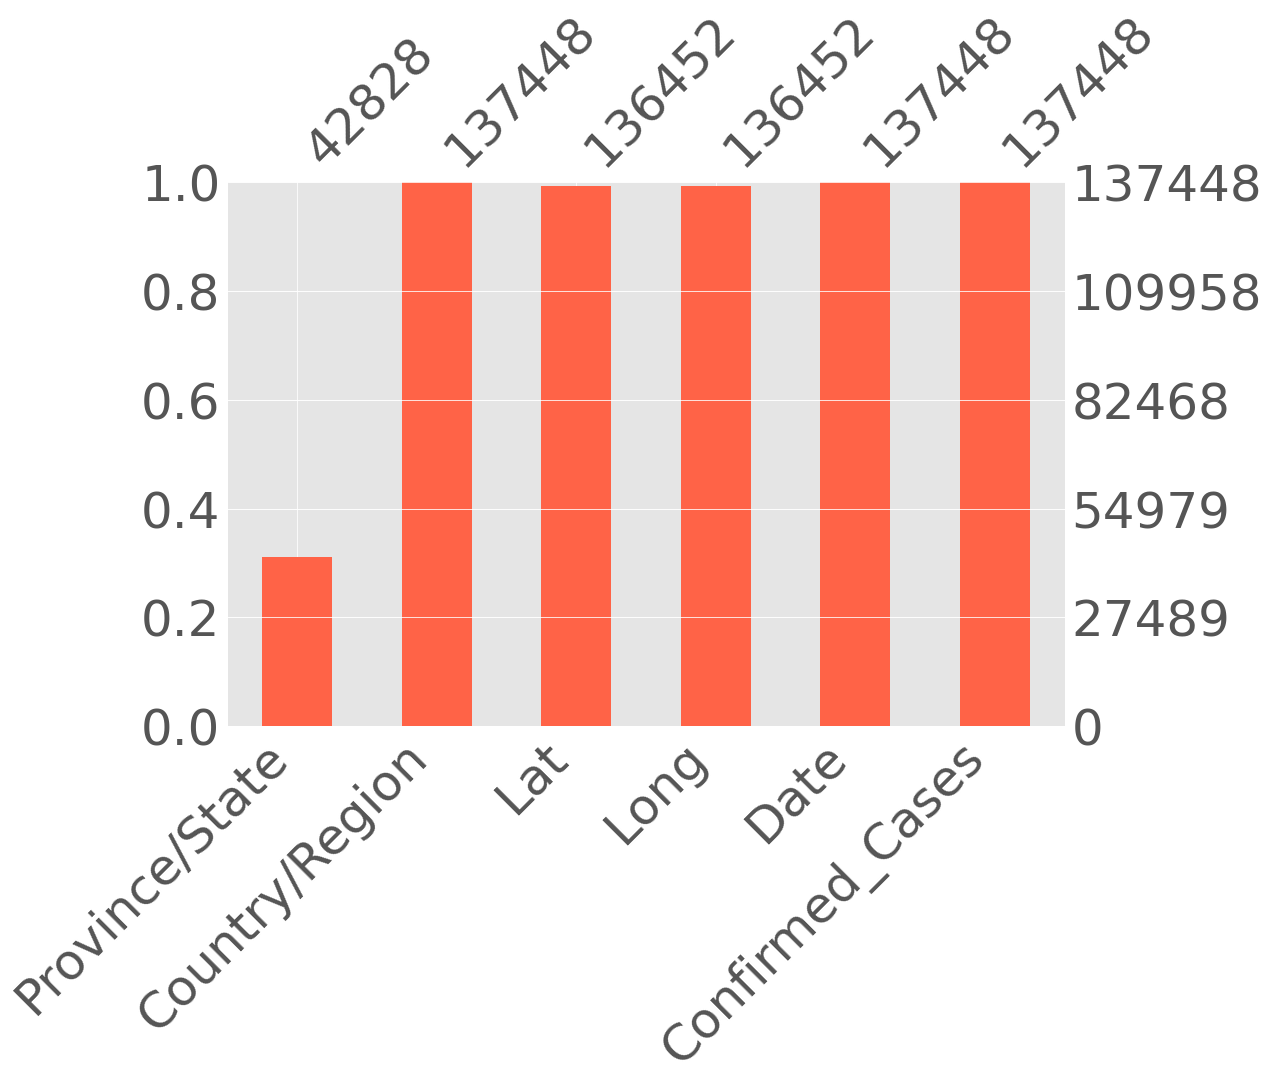

In [13]:
# visualize histogram 
msno.bar(melted_confirmed_df, fontsize=50, color="tomato", figsize=(15,10));

In [14]:
# get columns data
dates_columns = confirmed_cases.columns[4:]

# recovery data
melted_recoveries_df = recoveries.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                              value_vars=dates_columns, 
                              var_name='Date',
                              value_name='Recovered')

# format date
melted_recoveries_df['Date'] = pd.to_datetime(melted_recoveries_df['Date'])

# fill nan
melted_recoveries_df.fillna(0, inplace=True)

In [15]:
# combine two dataframe
df_combined = pd.concat([melted_confirmed_df, melted_deaths_df["Deaths"]], axis = 1, sort = False)

# format date
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# fill nan
df_combined.fillna(0, inplace=True)

In [16]:
# global daily data
df_global_daily = pd.DataFrame(df_combined[['Confirmed_Cases','Deaths','Date']].groupby('Date').sum()).sort_index()

In [17]:
# global daily recovery
df_global_recovery_daily = pd.DataFrame(melted_recoveries_df[['Recovered', 'Date']].groupby('Date').sum()).sort_index()

In [18]:
# countries daily data
df_countries_daily = pd.DataFrame(df_combined[['Confirmed_Cases','Deaths','Date','Country/Region']].groupby(['Date','Country/Region']).sum()).sort_index()

In [19]:
# countries daily recovery data
df_countries_recovery_daily = pd.DataFrame(melted_recoveries_df[['Recovered','Date','Country/Region']].groupby(['Date','Country/Region']).sum()).sort_index()

#### Latest data

In [20]:
# columns to use
latest_data_columns = ['Province_State',	'Country_Region', 'Lat', 'Long_', 'Confirmed',	'Deaths',	'Recovered',	'Active',	'Incident_Rate',	'Case_Fatality_Ratio']

# latest data
df_latest_data = latest_data[latest_data_columns]

# group by country
df_countries_latest= pd.DataFrame(df_latest_data[['Country_Region', 'Confirmed',	'Deaths',	'Recovered',	'Active',	'Incident_Rate']].groupby(['Country_Region']).sum()).sort_index()

#### Global Daily Data

In [21]:
# merging global daily
df_global_merged = pd.concat([df_global_daily, df_global_recovery_daily["Recovered"]], axis = 1, sort = False)

#### Global Daily Data based on countries

In [22]:
# merging countries daily
df_countries_merged = pd.concat([df_countries_daily, df_countries_recovery_daily["Recovered"]], axis = 1, sort = False)

#### Daily Vaccination

In [23]:
# columns to use
vaccine_data_columns = ['location',	'date', 'daily_vaccinations']

# vaccine data
df_vaccine_data = vaccine[vaccine_data_columns].copy()

# format date
df_vaccine_data['date'] = pd.to_datetime(df_vaccine_data['date'])

# fill nan
df_vaccine_data.fillna(0, inplace=True)

In [24]:
# total vaccination by country
df_total_vaccine_location = pd.DataFrame(df_vaccine_data[['location',	'daily_vaccinations']].groupby(['location']).sum()).sort_index()

In [25]:
df_vaccine_data

location       date  daily_vaccinations
0      Afghanistan 2021-02-22                 0.0
1      Afghanistan 2021-02-23              1367.0
2      Afghanistan 2021-02-24              1367.0
3      Afghanistan 2021-02-25              1367.0
4      Afghanistan 2021-02-26              1367.0
...            ...        ...                 ...
23757     Zimbabwe 2021-05-27             12285.0
23758     Zimbabwe 2021-05-28             12695.0
23759     Zimbabwe 2021-05-29             14056.0
23760     Zimbabwe 2021-05-30             14420.0
23761     Zimbabwe 2021-05-31             15022.0

[23762 rows x 3 columns]

### Vaccine Provider

In [26]:
# copy data
df_vaccine_manufacturer =  vaccine_manufacturer.copy()

# format date
df_vaccine_manufacturer['date'] = pd.to_datetime(df_vaccine_manufacturer['date'])

# fill nan
df_vaccine_manufacturer.fillna(0, inplace=True)

In [27]:
# daily vaccination by location
df_vaccine_location_manufacturer = pd.DataFrame(df_vaccine_manufacturer[['location',	'vaccine',	'total_vaccinations']].groupby(['location',	'vaccine']).max()).sort_index()

In [28]:
df_vaccine_location_manufacturer

total_vaccinations
location      vaccine                               
Chile         Oxford/AstraZeneca              278883
              Pfizer/BioNTech                3354533
              Sinovac                       15048767
Czechia       Johnson&Johnson                  39973
              Moderna                         495318
              Oxford/AstraZeneca              529566
              Pfizer/BioNTech                4249715
France        Johnson&Johnson                 282411
              Moderna                        3293785
              Oxford/AstraZeneca             5091517
              Pfizer/BioNTech               28115090
Germany       Johnson&Johnson                 559596
              Moderna                        4052929
              Oxford/AstraZeneca             9323478
              Pfizer/BioNTech               37604950
Iceland       Johnson&Johnson                  13469
              Moderna                          22551
              Oxford/AstraZeneca               67671
              Pfizer/BioNTech                 146109
Italy         Johnson&Johnson                 711231
              Moderna                        3296002
              Oxford/AstraZeneca             7189869
              Pfizer/BioNTech               24238751
Latvia        Johnson&Johnson                  18858
              Moderna                         150982
              Oxford/AstraZeneca              195946
              Pfizer/BioNTech                 394625
Lithuania     Johnson&Johnson                  34974
              Moderna                         151261
              Oxford/AstraZeneca              333733
              Pfizer/BioNTech                1133371
Romania       Johnson&Johnson                 120076
              Moderna                         654399
              Oxford/AstraZeneca              797307
              Pfizer/BioNTech                6292917
Switzerland   Moderna                        2671190
              Pfizer/BioNTech                2152743
United States Johnson&Johnson               10858664
              Moderna                      125016707
              Pfizer/BioNTech              160309262

In [29]:
# vaccine by location
df_vaccine_location = pd.DataFrame(df_vaccine_manufacturer[df_vaccine_manufacturer['date'] == df_vaccine_manufacturer['date'].max()][['location',	'total_vaccinations']].groupby(['location']).sum()).sort_index()

In [30]:
df_vaccine_location

total_vaccinations
location                         
Germany                  51540953
Italy                    35435853
Latvia                     760411
Lithuania                 1653339
United States           296184633

In [31]:
# Manufacturer supplying
Pfizer = df_vaccine_manufacturer[df_vaccine_manufacturer['vaccine']=='Pfizer/BioNTech'].groupby(['location']).max()['total_vaccinations'].values.sum()
Sinovac = df_vaccine_manufacturer[df_vaccine_manufacturer['vaccine']=='Sinovac'].groupby(['location']).max()['total_vaccinations'].values.sum()
AstraZeneca = df_vaccine_manufacturer[df_vaccine_manufacturer['vaccine']=='Oxford/AstraZeneca'].groupby(['location']).max()['total_vaccinations'].values.sum()
Moderna = df_vaccine_manufacturer[df_vaccine_manufacturer['vaccine']=='Moderna'].groupby(['location']).max()['total_vaccinations'].values.sum()
JohnsonJohnson = df_vaccine_manufacturer[df_vaccine_manufacturer['vaccine']=='Johnson&Johnson'].groupby(['location']).max()['total_vaccinations'].values.sum()

## Data Visualization

In [32]:
# choose color for visualization
colors_visualize = ["#009ACD","#660000","#8B008B","#b20000","#7f0000", "#04550e", "#00184c", "#dd6400", "#d2b715"]

In [33]:
# Plotting the vaccine delievery

fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Indicator(
    mode = "number",
    value = Pfizer,
    number={'font':{'color': colors_visualize[0],'size':80}},
    title = {"text": "Pfizer"},
    domain = {'x': [0.3, 0.7], 'y': [0.95, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = Moderna,
    number={'font':{'color': colors_visualize[1],'size':50}},
    title = {"text": "Moderna"},
    domain = {'x': [0.3, 0.7], 'y': [0.65, 0.75]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = AstraZeneca,
    number={'font':{'color': colors_visualize[2],'size':35}},
    title = {"text": "AstraZeneca"},
    domain = {'x': [0.3, 0.7], 'y': [0.4, 0.5]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = Sinovac,
    number={'font':{'color': colors_visualize[7],'size':30}},
    title = {"text": "Sinovac"},
    domain = {'x': [0.3, 0.7], 'y': [0.1, 0.4]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = JohnsonJohnson,
    number={'font':{'color': colors_visualize[3],'size':25}},
    title = {"text": "Johnson&Johnson"},
    domain = {'x': [0.3, 0.7], 'y': [0, 0.1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()

In [34]:
df_countries_daily = df_countries_merged.reset_index()
# format date
df_countries_daily['Date'] = pd.to_datetime(df_countries_daily['Date'])
df_countries_daily['Year'] = pd.to_datetime(df_countries_daily['Date']).dt.year
df_countries_daily['Month'] = df_countries_daily['Date'].dt.month
# create country codes
input_countries = df_countries_daily['Country/Region']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in input_countries]

df_countries_daily['Code'] = codes

In [35]:
df_countries_daily

Date      Country/Region  ...  Month          Code
0     2020-01-22         Afghanistan  ...      1            AF
1     2020-01-22             Albania  ...      1            AL
2     2020-01-22             Algeria  ...      1            DZ
3     2020-01-22             Andorra  ...      1            AD
4     2020-01-22              Angola  ...      1            AO
...          ...                 ...  ...    ...           ...
96109 2021-06-02             Vietnam  ...      6  Unknown code
96110 2021-06-02  West Bank and Gaza  ...      6  Unknown code
96111 2021-06-02               Yemen  ...      6            YE
96112 2021-06-02              Zambia  ...      6            ZM
96113 2021-06-02            Zimbabwe  ...      6            ZW

[96114 rows x 8 columns]

In [36]:
fig = px.choropleth(df_countries_daily, locations='Code', color='Confirmed_Cases', hover_name='Country/Region', 
                    animation_frame='Year', color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
fig.show() 

In [37]:
covid_cases = pd.DataFrame(df_countries_daily[['Country/Region',	'Confirmed_Cases',	'Deaths',	'Recovered']].groupby(['Country/Region']).max()).sort_values(by='Confirmed_Cases', ascending=False).reset_index()
covid_cases_top_10 = covid_cases.sort_values(by=['Confirmed_Cases'],ascending=False).head(10)
covid_cases_top_15 = covid_cases.sort_values(by=['Confirmed_Cases'],ascending=False).head(15)

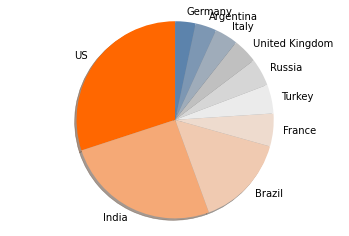

In [38]:
fig1, ax1 = plt.subplots()
colors = ["#FF6700","#F5A976","#F0CAB1","#EEDBCE","#EBEBEB", "#D6D6D6", "#C0C0C0", "#9FACBA", "#7D97B3","#5C83AC"]
ax1.pie(covid_cases_top_10['Confirmed_Cases'], labels=covid_cases_top_10['Country/Region'],
        shadow=True, startangle=90,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [39]:
# function to create pie charts
def donut(i,sizes,title,colors, pos, pct=None):
    plt.subplot(i)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                shadow=True, startangle=90, autopct= pct, pctdistance=0.9)

    centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.5)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.gca().annotate(title, xy=(pos, 0), fontsize=15)
    #plt.title(title)
    plt.axis('equal')

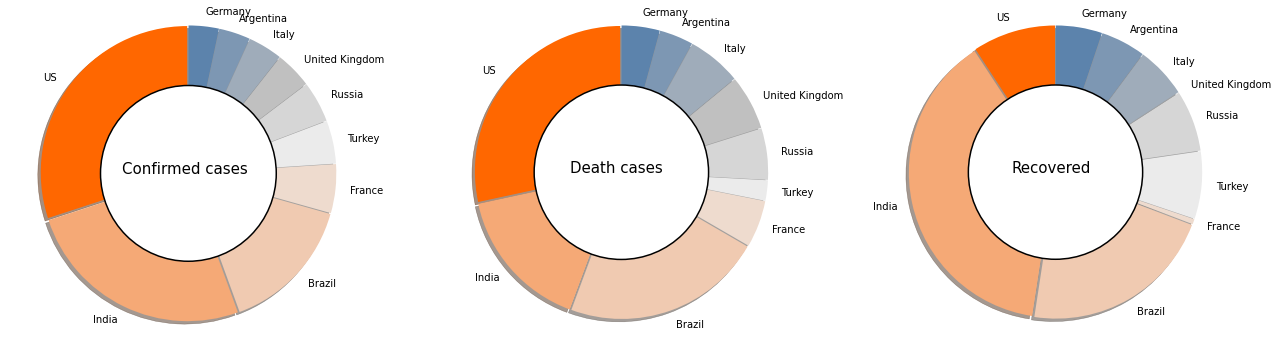

In [40]:
fig = plt.subplots(figsize=(22, 6))
labels = covid_cases_top_10['Country/Region'].to_list()
confirmed = covid_cases_top_10['Confirmed_Cases'].to_list()
deaths = covid_cases_top_10['Deaths'].to_list()
recovered = covid_cases_top_10['Recovered'].to_list()
colors = ["#FF6700","#F5A976","#F0CAB1","#EEDBCE","#EBEBEB", "#D6D6D6", "#C0C0C0", "#9FACBA", "#7D97B3","#5C83AC"]

# some other palette
#confirmed_colors = ["#FF6700","#F5A976","#F0CAB1","#EEDBCE","#EBEBEB", "#D6D6D6", "#C0C0C0", "#9FACBA", "#7D97B3","#5C83AC"]
#deaths_colors = ["#03071E","#370617","#6A040F","#9D0208","#D00000", "#DC2F02", "#E85D04", "#F48C06", "#FAA307","#FFBA08"]
#recovered_colors = ["#D9ED92","#76C893","#52B69A", "#34A0A4", "#168AAD", "#1A759F", "#1E6091","#2D5E83","#406D8E","#517A98"]
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) 

donut(131,confirmed,'Confirmed cases',colors,-0.45)
donut(132,deaths,'Death cases',colors,-0.35)
donut(133,recovered,'Recovered',colors,-0.3)
plt.show()

In [41]:
covid_cases_top_10['Hospitalized'] = covid_cases_top_10['Confirmed_Cases']-covid_cases_top_10['Deaths']-covid_cases_top_10['Recovered']
covid_cases_top_15['Hospitalized'] = covid_cases_top_15['Confirmed_Cases']-covid_cases_top_15['Deaths']-covid_cases_top_15['Recovered']
covid_cases_top_15

Country/Region  Confirmed_Cases  Deaths  Recovered  Hospitalized
0               US         33307008  595825    6298082      26413101
1            India         28307832  335102   26179085       1793645
2           Brazil         16720081  467706   14763694       1488681
3           France          5978650  109841     392596       5476213
4           Turkey          5263697   47768    5131453         84476
5           Russia          5031583  120217    4648191        263175
6   United Kingdom          4510597  128057      15514       4367026
7            Italy          4223200  126283    3886867        210050
8        Argentina          3852156   79320    3409316        363520
9          Germany          3698004   88945    3518860         90199
10           Spain          3687762   80049     150376       3457337
11        Colombia          3459422   89808    3218620        150994
12            Iran          2935443   80488    2494108        360847
13          Poland          2873527   73984    2641139        158404
14          Mexico          2423928  228146    1932457        263325

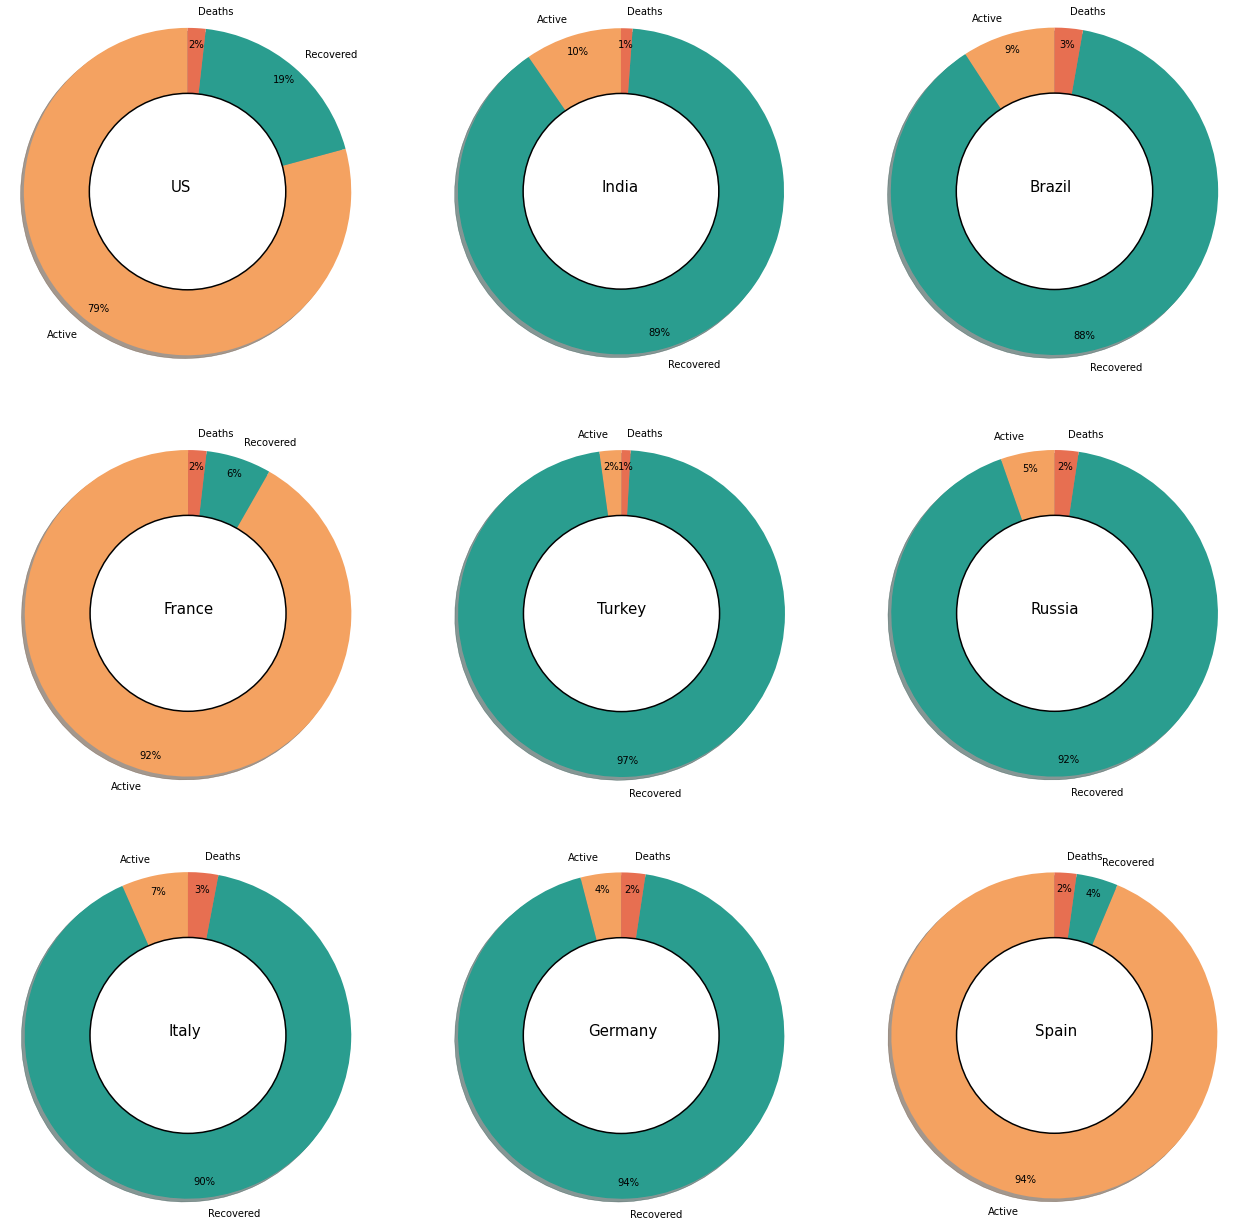

In [42]:
explode = (0.0, 0.0, 0.0) 

fig = plt.subplots(figsize=(22, 22))
labels = ['Active', 'Recovered', 'Deaths']
us = ['26255047', '6298082', '590533']
india = ['2586782', '24054861', '307231']
brazil = ['1480254', '14190644', '449858']
france = ['5483870', '385961', '108819']
turkey = ['113248', '5034316', '46446']
russia = ['264758', '4570842', '116812']
italy = ['276439', '3792898', '125335']
germany = ['147149', '3425380', '87461']
spain = ['3417433', '150376', '79711']

colors = ["#F4A261","#2A9D8F","#E76F51"]

donut(331,us,'US',colors,-0.1, pct='%.0f%%')
donut(332,india,'India',colors,-0.12, pct='%.0f%%')
donut(333,brazil,'Brazil',colors,-0.15, pct='%.0f%%')
donut(334,france,'France',colors,-0.15, pct='%.0f%%')
donut(335,turkey,'Turkey',colors,-0.15, pct='%.0f%%')
donut(336,russia,'Russia',colors,-0.15, pct='%.0f%%')
donut(337,italy,'Italy',colors,-0.12, pct='%.0f%%')
donut(338,germany,'Germany',colors,-0.20, pct='%.0f%%')
donut(339,spain,'Spain',colors,-0.12, pct='%.0f%%')
plt.show()

In [43]:
covid_cases

Country/Region  Confirmed_Cases  Deaths  Recovered
0                  US         33307008  595825    6298082
1               India         28307832  335102   26179085
2              Brazil         16720081  467706   14763694
3              France          5978650  109841     392596
4              Turkey          5263697   47768    5131453
..                ...              ...     ...        ...
188           Vanuatu                4       1          3
189  Marshall Islands                4       0          4
190             Samoa                3       0          3
191          Kiribati                2       0          0
192        Micronesia                1       0          1

[193 rows x 4 columns]

In [44]:
bar_df = covid_cases_top_15.set_index('Country/Region')
bar_df = bar_df[['Hospitalized', 'Recovered', 'Deaths']].div(bar_df.Confirmed_Cases, axis=0)
bar_df.columns = ['Active', 'Recovered', 'Deaths']

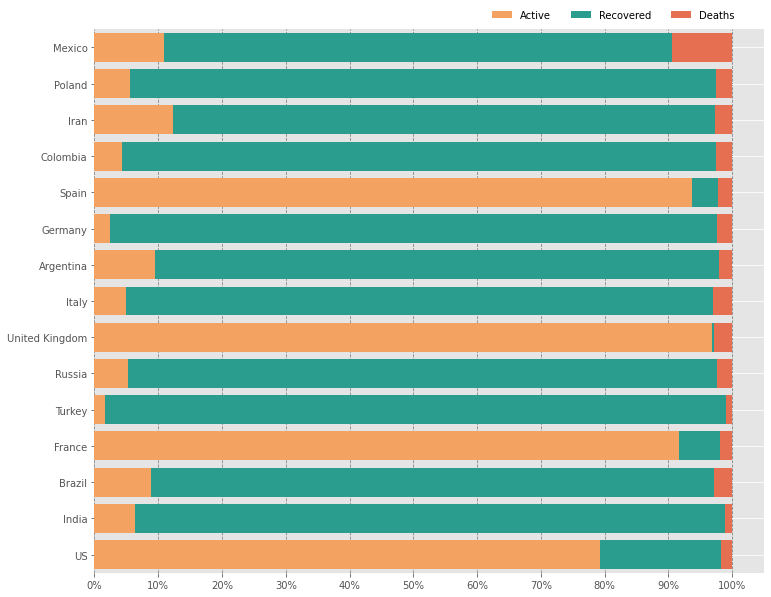

In [45]:

# variables
labels = ['Active', 'Recovered', 'Deaths']
colors = ["#F4A261","#2A9D8F","#E76F51"]

def plot_stackedbar_p(df, labels, colors):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
# legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=3, frameon=False)
# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
# format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
# adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
    
plot_stackedbar_p(bar_df, labels, colors)

In [46]:
len(bar_df) * [0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

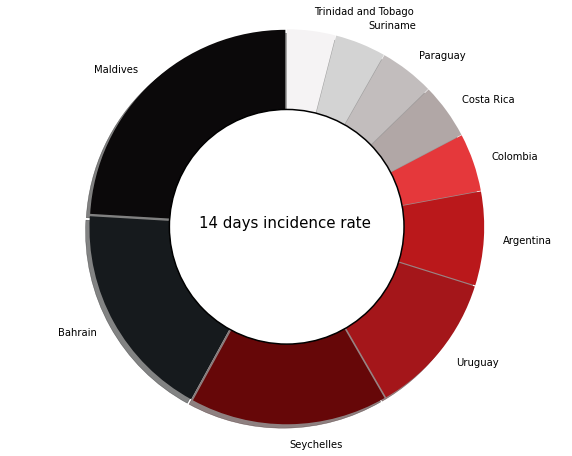

In [47]:
incidence_rate = cases_incidence.sort_values(by='14-day-incidence-rate', ascending=False).reset_index().head(n=10)

# pie chart
fig = plt.subplots(figsize=(10, 8))
labels = incidence_rate['Country'].to_list()
incidence_rate = incidence_rate['14-day-incidence-rate'].to_list()
colors = ["#0B090A","#161A1D","#660708","#A4161A","#BA181B", "#E5383B", "#B1A7A6", "#C2BDBD", "#D3D3D3","#F5F3F4"]

explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01) 

donut(111,incidence_rate,'14 days incidence rate',colors,-0.45)

In [48]:
cases_incidence.sort_values(by='14-day-incidence-rate', ascending=False).reset_index().head(n=10)

Country  14-day-sum  population  14-day-incidence-rate
0             Maldives       15066      540542                 2787.2
1              Bahrain       35433     1701583                 2082.4
2           Seychelles        1857       98340                 1888.3
3              Uruguay       47583     3473727                 1369.8
4            Argentina      405112    45195777                  896.3
5             Colombia      282210    50882884                  554.6
6           Costa Rica       26966     5094114                  529.4
7             Paraguay       37377     7132530                  524.0
8             Suriname        2857      586634                  487.0
9  Trinidad and Tobago        6499     1399491                  464.4

In [49]:
fig = px.bar(cases_incidence.sort_values(by='14-day-incidence-rate', ascending=False).reset_index().head(n=10), x = "Country", y = "14-day-incidence-rate",text="14-day-incidence-rate",color="Country",color_discrete_sequence= ["#0B090A","#161A1D","#660708","#A4161A","#BA181B", "#E5383B", "#B1A7A6", "#C2BDBD", "#D3D3D3","#F5F3F4"])
fig.show()

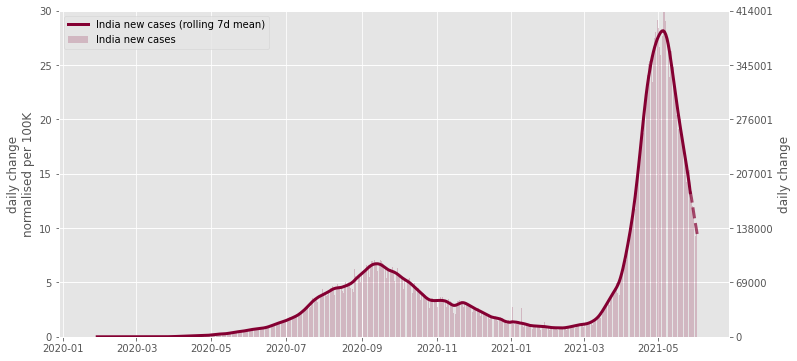

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
cases, deaths = ov.get_country_data("India") 
ov.plot_daily_change(ax=ax, series=cases, color="#840032", 
                     labels=("India", "cases"));

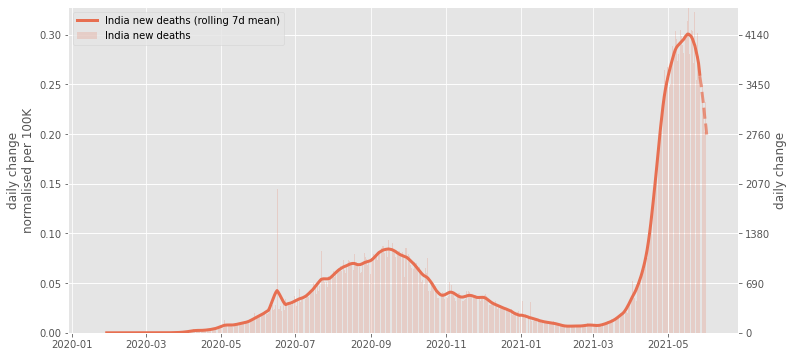

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
ov.plot_daily_change(ax=ax, series=deaths, color="#E76F51", 
                     labels=("India", "deaths"));

In [52]:
cases_incidence

14-day-sum  population  14-day-incidence-rate
Country                                                          
Afghanistan               9451    38928341                   24.3
Albania                    233     2877800                    8.1
Algeria                   3484    43851043                    7.9
Andorra                    175       77265                  226.5
Angola                    3299    32866268                   10.0
...                        ...         ...                    ...
Vietnam                   3061    97338583                    3.1
West Bank and Gaza        4504     5101416                   88.3
Yemen                      146    29825968                    0.5
Zambia                    3809    18383956                   20.7
Zimbabwe                   396    14862927                    2.7

[193 rows x 3 columns]

In [53]:


day_incidence = cases_incidence['14-day-incidence-rate'].tolist()

country_list = cases_incidence.index.tolist()
#country_set = set(country_list)
#country_list = list(country_set)
#country_list.sort()

new_df = pd.DataFrame(list(zip(country_list, day_incidence)), 
               columns =['Country', 'Incidence'])

new_df = new_df[(new_df['Incidence']>0.1) & (new_df['Incidence'] < 1200)].sort_values(by='Incidence', ascending=True)
#colors = ["#F9F9F5", "#FAFAE6", "#FCFCCB", "#FCFCAE",  "#FCF1AE", "#FCEA7D", "#FCD97D",
#          "#FCCE7D", "#FCC07D", "#FEB562", "#F9A648",  "#F98E48", "#FD8739", "#FE7519",
#          "#FE5E19", "#FA520A", "#FA2B0A", "#9B1803",  "#861604", "#651104", "#570303",]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Incidence'],
    text = new_df['Incidence'],
    #colorscale = colors,
    autocolorscale=True,
    reversescale=False,
    colorbar_title = '14 days incidence rate',
))

fig.update_layout(
    title_text='14 days incidence rate',
    geo=dict(
        showcoastlines=False,
    ),
)

In [54]:
population = cases_incidence['population'].tolist()

country_list = cases_incidence.index.tolist()

new_df = pd.DataFrame(list(zip(country_list, population)), 
               columns =['Country', 'Population'])

#new_df = new_df[(new_df['Incidence']>0.1) & (new_df['Incidence'] < 600)].sort_values(by='Incidence', ascending=True)
colors = ["#780000","#c1121f","#ab2531","#953843","#804a54","#6a5d66","#547078","#2a5060","#003049","#669bbc"]


fig = go.Figure(data=go.Choropleth(
    locationmode = "country names",
    locations = new_df['Country'],
    z = new_df['Population'],
    text = new_df['Population'],
    colorscale=colors,
    #autocolorscale=True,
    reversescale=True,
    colorbar_title = 'Population',
))

fig.update_layout(
    title_text='Population',
    geo=dict(
        showcoastlines=False,
    ),
)

In [55]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_global_merged.index, y=df_global_merged["Confirmed_Cases"],
                    mode='markers',
                    name='Confirmed',marker_color="#840032"))
fig.add_trace(go.Scatter(x=df_global_merged.index, y=df_global_merged["Recovered"],
                    mode='markers',
                    name='Recovered', marker_color="#2A9D8F"))
fig.add_trace(go.Scatter(x=df_global_merged.index, y=df_global_merged["Deaths"],
                    mode='markers',
                    name='Death', marker_color="#E76F51"))
fig.update_layout(title="Confirmed, Recovered, Death case counts",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_yaxes(type="log")
fig.show()

In [56]:
df_india_daily = df_countries_daily[df_countries_daily['Country/Region'] == 'India']

In [118]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df_india_daily.Date, y=df_india_daily["Confirmed_Cases"],
                    mode='markers',
                    name='Confirmed',marker_color="#840032"))
fig.add_trace(go.Scatter(x=df_india_daily.Date, y=df_india_daily["Recovered"],
                    mode='markers',
                    name='Recovered', marker_color="#2A9D8F"))
fig.add_trace(go.Scatter(x=df_india_daily.Date, y=df_india_daily["Deaths"],
                    mode='markers',
                    name='Death', marker_color="#E76F51"))
fig.update_layout(                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.update_yaxes(type="log")
fig.show()

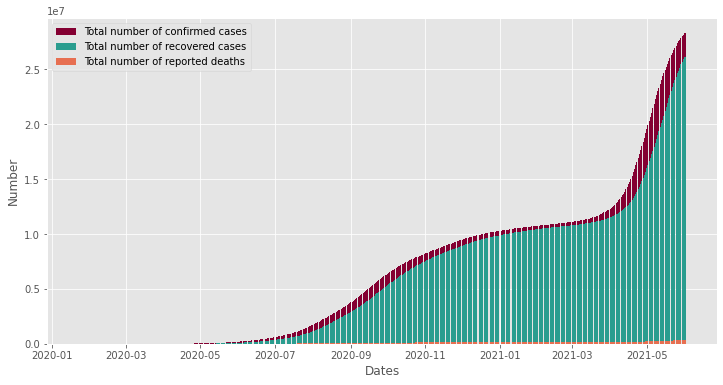

In [58]:
df_india_daily = df_countries_daily[df_countries_daily['Country/Region'] == 'India']

plt.figure(figsize=(12,6))
plt.bar(df_india_daily.Date, df_india_daily.Confirmed_Cases, color='#840032', label="Total number of confirmed cases")
plt.bar(df_india_daily.Date, df_india_daily.Recovered, color='#2A9D8F',label="Total number of recovered cases")
plt.bar(df_india_daily.Date, df_india_daily.Deaths, color='#E76F51',label="Total number of reported deaths")
plt.xlabel("Dates")
plt.ylabel("Number")
plt.legend()
plt.show()

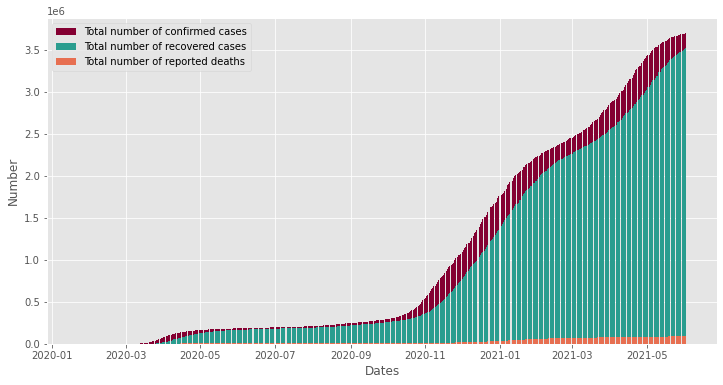

In [59]:
df_ger_daily = df_countries_daily[df_countries_daily['Country/Region'] == 'Germany']

plt.figure(figsize=(12,6))
plt.bar(df_ger_daily.Date, df_ger_daily.Confirmed_Cases, color='#840032', label="Total number of confirmed cases")
plt.bar(df_ger_daily.Date, df_ger_daily.Recovered, color='#2A9D8F',label="Total number of recovered cases")
plt.bar(df_ger_daily.Date, df_ger_daily.Deaths, color='#E76F51',label="Total number of reported deaths")
plt.xlabel("Dates")
plt.ylabel("Number")
plt.legend()
plt.show()



In [60]:
tree_color = ["#0d1321","#1d2d44","#3e5c76","#46637e","#4d6a85","#55718d","#5d7794","#657e9c",
              "#6c85a3","#6d86a4","#6e87a5","#6f87a6","#7088a7","#7089a7","#718aa8","#728aa9","#738baa","#748cab",
              "#8196b3","#8da1ba","#9aabc2","#a7b6ca","#b3c0d1","#c0cbd9","#ccd5e0","#d9e0e8","#dce3ea","#e0e6ec"]
fig = px.treemap(covid_cases.head(n=25), path=["Country/Region"], values="Confirmed_Cases", title='Confirmed Cases', color_discrete_sequence = tree_color)
fig.show()

In [61]:
fig = px.treemap(covid_cases.head(n=25), path=["Country/Region"], values="Deaths", title='Deaths', color_discrete_sequence = tree_color)
fig.show()

In [62]:
folium_map = folium.Map(location=[33.886917, 9.537499], zoom_start=2, tiles='Stamen Toner',control_scale=True)
color="yellow"

most_recent_date = df_combined['Date'].max()
df_latest_day = df_combined[df_combined.Date==most_recent_date]

for place in df_latest_day.index:
    lat = df_latest_day.loc[place]["Lat"]
    lng = df_latest_day.loc[place]["Long"]    
    confirmed = df_latest_day.loc[place]["Confirmed_Cases"]
    deaths = df_latest_day.loc[place]["Deaths"]
   
    # draw a circle on the province / state / region / country
    #marker_confirmed = folium.CircleMarker(location=[lat, lng],radius=confirmed/scale,color="#F4A261",fill=True)
    #marker_confirmed.add_to(folium_map)
    
    marker_deaths = folium.CircleMarker(location=[lat, lng],radius=deaths/5000,color="#ee6352",fill=True,)
    marker_deaths.add_to(folium_map)
    
display(folium_map)

In [63]:
folium_map = folium.Map(location=[33.886917, 9.537499], zoom_start=2, tiles='Stamen Toner',control_scale=True)
color="yellow"

most_recent_date = df_combined['Date'].max()
df_latest_day = df_combined[df_combined.Date==most_recent_date]

for place in df_latest_day.index:
    lat = df_latest_day.loc[place]["Lat"]
    lng = df_latest_day.loc[place]["Long"]    
    confirmed = df_latest_day.loc[place]["Confirmed_Cases"]
    deaths = df_latest_day.loc[place]["Deaths"]
   
    # draw a circle on the province / state / region / country
    marker_confirmed = folium.CircleMarker(location=[lat, lng],radius=confirmed/400000,color="#840032",fill=True)
    marker_confirmed.add_to(folium_map)
    
display(folium_map)

In [127]:
fig = px.bar(df_countries_daily[df_countries_daily['Country/Region'].isin(['US', 'India', 'Brazil'])], x="Date", y="Confirmed_Cases", color='Country/Region', color_discrete_sequence= ["#003049","#d62828","#f77f00"])
fig.update_xaxes(tickangle=-0)
fig.show()

In [65]:
fig = px.bar(df_countries_daily[df_countries_daily['Country/Region'].isin(['US', 'India', 'Brazil'])], x="Date", y="Deaths", color='Country/Region',
             title='Number of deaths')
fig.update_xaxes(tickangle=-0)
fig.show()

In [66]:
fig = px.line(df_countries_daily[df_countries_daily['Country/Region'].isin(['US', 'India', 'Brazil','France','Turkey','Russia'])], x="Date", y="Confirmed_Cases", color='Country/Region',
             title='Number of confirmed cases')
fig.update_layout(hovermode='closest',template='seaborn',width=700,xaxis=dict(mirror=True,linewidth=3,linecolor='black',showgrid=True),
                 yaxis=dict(mirror=True,linewidth=2,linecolor='black'))
fig.show()

In [131]:
df_us_daily = df_countries_daily[df_countries_daily['Country/Region'] == 'US']
df_brazil_daily = df_countries_daily[df_countries_daily['Country/Region'] == 'Brazil']

fig = go.Figure(data=[
    go.Bar(name='US', x=df_us_daily['Date'], y=df_us_daily['Confirmed_Cases'],marker = dict(color="#f77f00")),
    go.Bar(name='India', x=df_india_daily['Date'], y=df_india_daily['Confirmed_Cases'],marker = dict(color="#d62828")),
    go.Bar(name='Brazil', x=df_brazil_daily['Date'], y=df_brazil_daily['Confirmed_Cases'],marker = dict(color="#003049"))
])
# Change the bar mode
fig.update_layout(barmode='overlay',
                 annotations=[dict(x='2020-03-09', y=1797, xref="x", yref="y", text="Lockdown<br>Imposed<br>(9th March)", showarrow=True, arrowhead=1, ax=-50, ay=-50)])
fig.update_layout(hovermode='closest',template='seaborn',width=700,
                 yaxis=dict(mirror=True))
fig.show()

In [68]:
covid_cases

Country/Region  Confirmed_Cases  Deaths  Recovered
0                  US         33307008  595825    6298082
1               India         28307832  335102   26179085
2              Brazil         16720081  467706   14763694
3              France          5978650  109841     392596
4              Turkey          5263697   47768    5131453
..                ...              ...     ...        ...
188           Vanuatu                4       1          3
189  Marshall Islands                4       0          4
190             Samoa                3       0          3
191          Kiribati                2       0          0
192        Micronesia                1       0          1

[193 rows x 4 columns]

In [69]:
#Interactive scatter plot ===> Confirmed cases at diff country levels
fig4 = px.scatter(covid_cases.sort_values('Confirmed_Cases',ascending=False).head(30),x='Confirmed_Cases',y='Recovered',color='Country/Region'
                  ,size='Confirmed_Cases')
fig4.update_traces(textposition='top center')
#fig4.update_layout(xaxis_rangeslider_visible=True)
fig4.show()

In [70]:
#Interactive scatter plot ===> Confirmed cases at diff country levels
fig4 = px.scatter(covid_cases.sort_values('Confirmed_Cases',ascending=False).head(30),x='Confirmed_Cases',y='Deaths',color='Country/Region'
                  ,size='Confirmed_Cases')
fig4.update_traces(textposition='top center')
#fig4.update_layout(xaxis_rangeslider_visible=True)
fig4.show()

In [71]:
fig = px.bar(covid_cases.sort_values("Confirmed_Cases",ascending=False).head(10), x = "Country/Region", y = "Confirmed_Cases",text="Confirmed_Cases", color='Confirmed_Cases')
fig.show()

In [72]:
confirmed_cases = covid_cases['Confirmed_Cases'].sum()
deaths_cases = covid_cases['Deaths'].sum()
recoverd_cases = covid_cases['Recovered'].sum()
active_cases = confirmed_cases-deaths_cases-recoverd_cases

In [73]:
fig = go.Figure()
fig.add_trace(go.Indicator(mode="number",value=int(confirmed_cases),number={"valueformat":"0.f"},
             title={"text":"Total_Confirmed"},domain={"row":0,"column":0}))

fig.add_trace(go.Indicator(mode="number",value=int(deaths_cases),number={"valueformat":"0.f"},
             title={"text":"Total_Deaths"},domain={"row":0,"column":1}))

fig.add_trace(go.Indicator(mode="number",value=int(recoverd_cases),number={"valueformat":"0.f"},
             title={"text":"Total_Recovered"},domain={"row":1,"column":0}))

fig.add_trace(go.Indicator(mode="number",value=int(active_cases),number={"valueformat":"0.f"},
             title={"text":"Total_Active_Case"},domain={"row":1,"column":1}))

fig.update_layout(grid={"rows":2,"columns":2,"pattern":"independent"})
fig.show()

In [74]:
df_countries_daily.sort_values('Confirmed_Cases',ascending=False).head(20)

Date Country/Region  Confirmed_Cases  ...  Year  Month          Code
96100 2021-06-02             US         33307008  ...  2021      6  Unknown code
95907 2021-06-01             US         33290450  ...  2021      6  Unknown code
95714 2021-05-31             US         33267507  ...  2021      5  Unknown code
95521 2021-05-30             US         33261731  ...  2021      5  Unknown code
95328 2021-05-29             US         33254998  ...  2021      5  Unknown code
95135 2021-05-28             US         33242999  ...  2021      5  Unknown code
94942 2021-05-27             US         33221141  ...  2021      5  Unknown code
94749 2021-05-26             US         33193687  ...  2021      5  Unknown code
94556 2021-05-25             US         33169715  ...  2021      5  Unknown code
94363 2021-05-24             US         33146976  ...  2021      5  Unknown code
94170 2021-05-23             US         33121157  ...  2021      5  Unknown code
93977 2021-05-22             US         33108291  ...  2021      5  Unknown code
93784 2021-05-21             US         33088492  ...  2021      5  Unknown code
93591 2021-05-20             US         33060540  ...  2021      5  Unknown code
93398 2021-05-19             US         33030332  ...  2021      5  Unknown code
93205 2021-05-18             US         33001039  ...  2021      5  Unknown code
93012 2021-05-17             US         32973249  ...  2021      5  Unknown code
92819 2021-05-16             US         32944627  ...  2021      5  Unknown code
92626 2021-05-15             US         32927740  ...  2021      5  Unknown code
92433 2021-05-14             US         32898886  ...  2021      5  Unknown code

[20 rows x 8 columns]

In [75]:
df_vaccine_data

location       date  daily_vaccinations
0      Afghanistan 2021-02-22                 0.0
1      Afghanistan 2021-02-23              1367.0
2      Afghanistan 2021-02-24              1367.0
3      Afghanistan 2021-02-25              1367.0
4      Afghanistan 2021-02-26              1367.0
...            ...        ...                 ...
23757     Zimbabwe 2021-05-27             12285.0
23758     Zimbabwe 2021-05-28             12695.0
23759     Zimbabwe 2021-05-29             14056.0
23760     Zimbabwe 2021-05-30             14420.0
23761     Zimbabwe 2021-05-31             15022.0

[23762 rows x 3 columns]

In [134]:
df_us_vaccine_daily = df_vaccine_data[df_vaccine_data['location'] == 'United States']
df_brazil_vaccine_daily = df_vaccine_data[df_vaccine_data['location'] == 'Brazil']
df_india_vaccine_daily = df_vaccine_data[df_vaccine_data['location'] == 'India']

fig = go.Figure(data=[
    go.Bar(name='US', x=df_us_vaccine_daily['date'], y=df_us_vaccine_daily['daily_vaccinations'],marker = dict(color="#f77f00")),
    go.Bar(name='India', x=df_india_vaccine_daily['date'], y=df_india_vaccine_daily['daily_vaccinations'],marker = dict(color="#d62828")),
    go.Bar(name='Brazil', x=df_brazil_vaccine_daily['date'], y=df_brazil_vaccine_daily['daily_vaccinations'],marker = dict(color="#003049"))
])
# Change the bar mode
fig.update_layout(barmode='overlay',
                 annotations=[dict(x='2020-03-09', y=1797, xref="x", yref="y", text="Lockdown<br>Imposed<br>(9th March)", showarrow=True, arrowhead=1, ax=-50, ay=-50)])
fig.update_layout(hovermode='closest',template='seaborn',width=700)
fig.show()

In [77]:
df_vaccine_data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe',
       'European Union', 

In [78]:
total_vaccination = pd.DataFrame(df_vaccine_data[~df_vaccine_data['location'].isin(['World', 'Asia', 'Upper middle income','High income','North America','Europe','Lower middle income','European Union','South America'])][['location',	'daily_vaccinations']].groupby(['location']).sum()).sort_values("daily_vaccinations",ascending=False).reset_index()

In [79]:
fig = px.bar(total_vaccination.head(10), x = "location", y = "daily_vaccinations",text="daily_vaccinations", color='daily_vaccinations')
fig.show()

In [81]:
data_df = cases_incidence.sort_values(by='14-day-incidence-rate', ascending=False).reset_index().reset_index()
data_pop_df = cases_incidence.sort_values(by='population', ascending=False).reset_index().reset_index()

# create tuples fpr wordcloud
total_tupels = [tuple(x) for x in total_vaccination.values]
confirmed_tupels = [tuple(x) for x in covid_cases[['Country/Region','Confirmed_Cases']].values]
deaths_tupels = [tuple(x) for x in covid_cases[['Country/Region','Deaths']].values]
recovered_tupels = [tuple(x) for x in covid_cases[['Country/Region','Recovered']].values]
population_tupels = [tuple(x) for x in data_pop_df[['Country','population']].values]
incidencerate_tupels = [tuple(x) for x in data_df[['Country','14-day-incidence-rate']].values]

#colormap
color = 'afmhot'

#mask
mask = np.array(Image.open("/content/Goethe.png"))

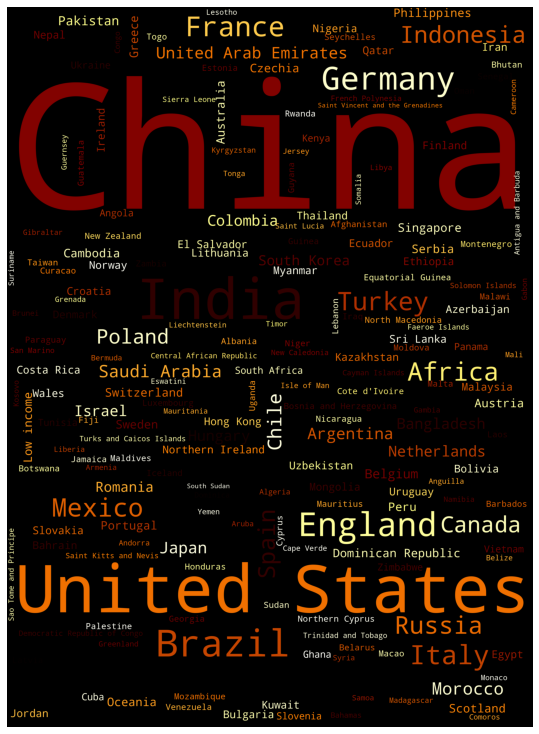

In [82]:
wc = WordCloud(background_color='black', colormap=color,collocations=False,random_state=1, 
 mask = mask,scale=6, relative_scaling ='auto',max_font_size=400).generate_from_frequencies(dict(total_tupels))
plt.figure(figsize = [15,10])
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

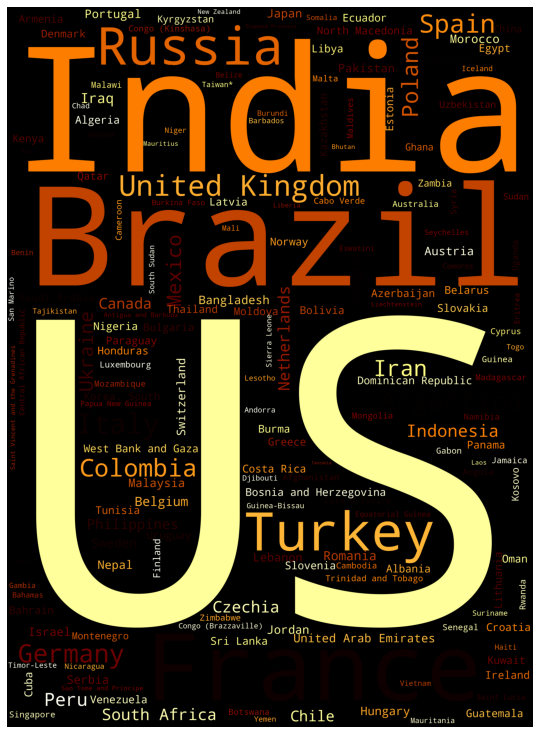

In [83]:
wc = WordCloud(background_color='black', colormap=color,collocations=False,random_state=1, 
 mask = mask,scale=6, relative_scaling ='auto',max_font_size=400).generate_from_frequencies(dict(confirmed_tupels))
plt.figure(figsize = [15,10])
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

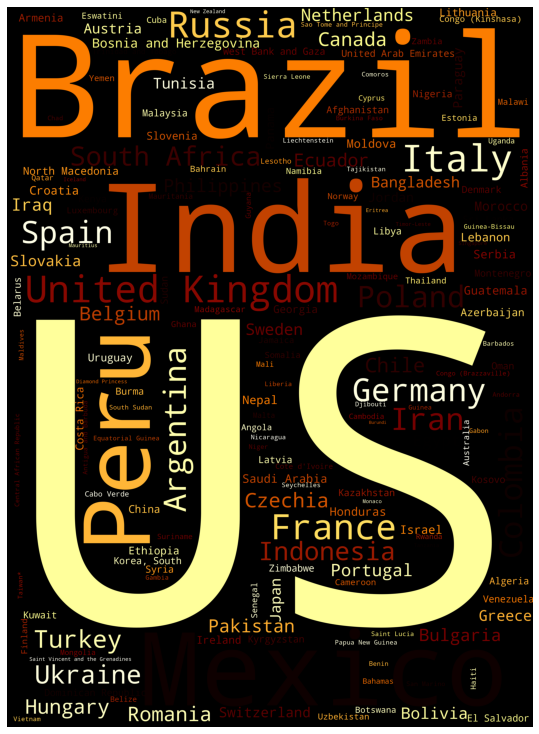

In [84]:
wc = WordCloud(background_color='black', colormap=color,collocations=False,random_state=1, 
 mask = mask,scale=6, relative_scaling ='auto',max_font_size=400).generate_from_frequencies(dict(deaths_tupels))
plt.figure(figsize = [15,10])
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

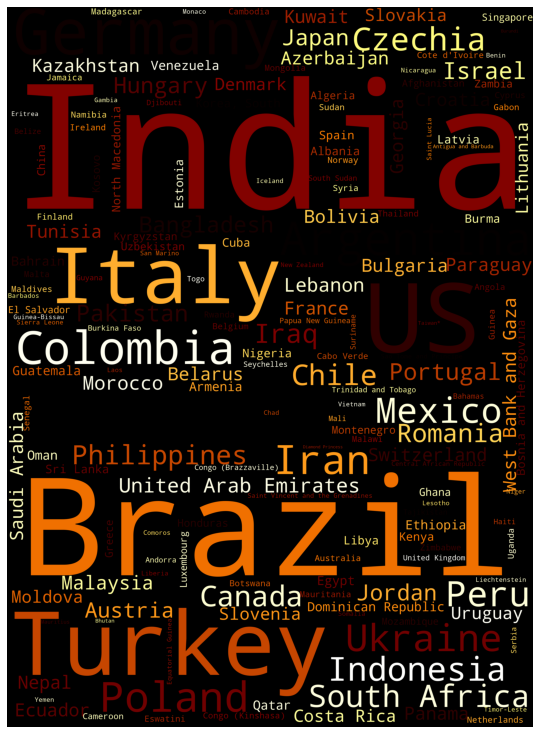

In [85]:
wc = WordCloud(background_color='black', colormap=color,collocations=False,random_state=1, 
 mask = mask,scale=6, relative_scaling ='auto',max_font_size=400).generate_from_frequencies(dict(recovered_tupels))
plt.figure(figsize = [15,10])
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

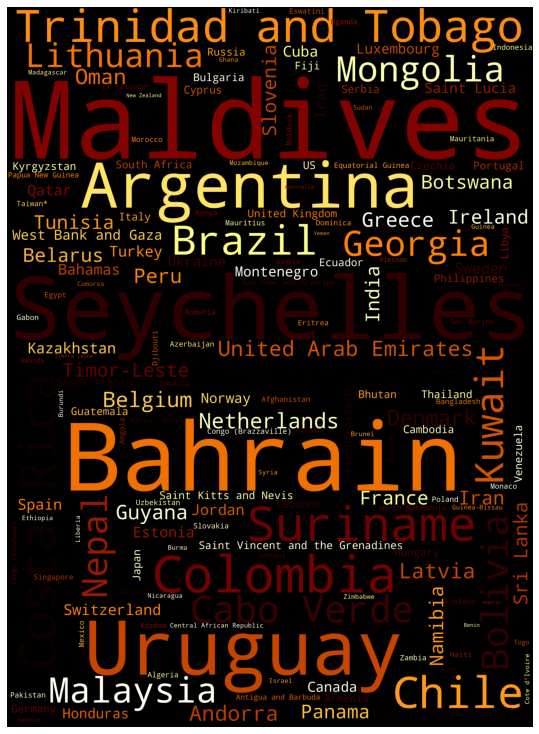

In [86]:
wc = WordCloud(background_color='black', colormap=color,collocations=False,random_state=1, 
 mask = mask,scale=6, relative_scaling ='auto',max_font_size=400).generate_from_frequencies(dict(incidencerate_tupels))
plt.figure(figsize = [15,10])
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

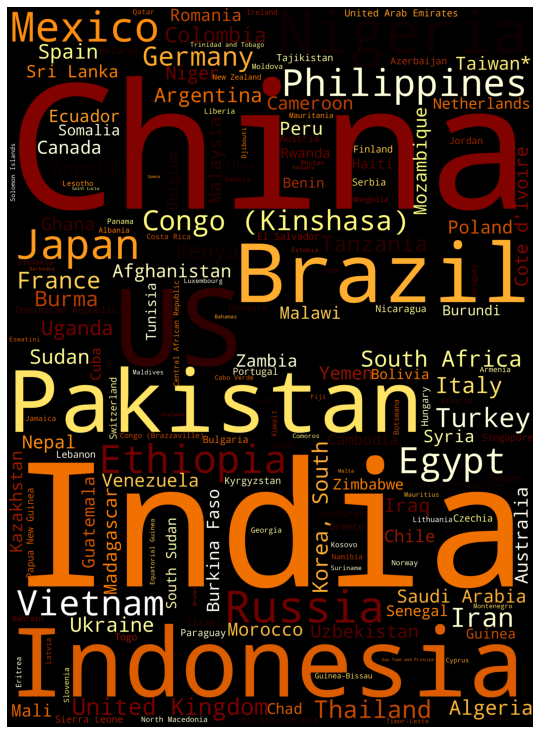

In [87]:
wc = WordCloud(background_color='black', colormap=color,collocations=False,random_state=1, 
 mask = mask,scale=6, relative_scaling ='auto',max_font_size=400).generate_from_frequencies(dict(population_tupels))
plt.figure(figsize = [15,10])
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [88]:
# country to continent
covid_cases

Country/Region  Confirmed_Cases  Deaths  Recovered
0                  US         33307008  595825    6298082
1               India         28307832  335102   26179085
2              Brazil         16720081  467706   14763694
3              France          5978650  109841     392596
4              Turkey          5263697   47768    5131453
..                ...              ...     ...        ...
188           Vanuatu                4       1          3
189  Marshall Islands                4       0          4
190             Samoa                3       0          3
191          Kiribati                2       0          0
192        Micronesia                1       0          1

[193 rows x 4 columns]

In [89]:
#create df
df_continent = covid_cases[~covid_cases['Country/Region'].isin(['West Bank and Gaza','Burma','Korea, South','Kosovo',"Cote d'Ivoire",'Congo (Kinshasa)','Congo (Brazzaville)','Zimbabwe','Timor-Leste','Taiwan*'])].sort_values(by='Confirmed_Cases', ascending=False).head(n=165)
df_continent["Country/Region"].replace({"US": "United States"}, inplace=True)
# create continent name
input_countries = df_continent['Country/Region']

continent = [pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country, cn_name_format="default"))) for country in input_countries]

df_continent['Continent'] = continent

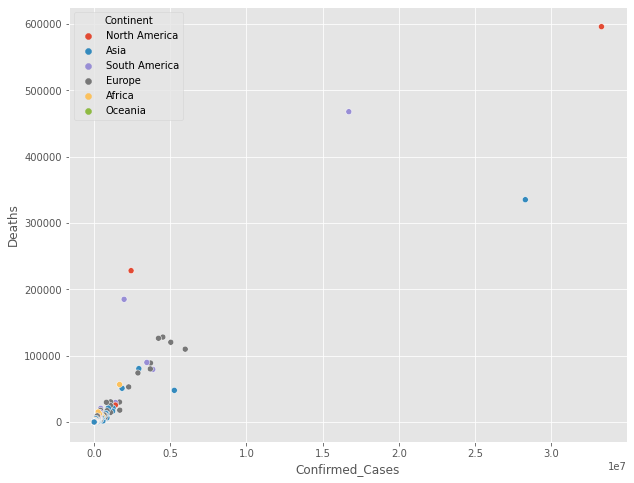

In [109]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_continent, x="Confirmed_Cases", y="Deaths", hue="Continent",
    sizes=(20, 60), legend="full", ax = ax);

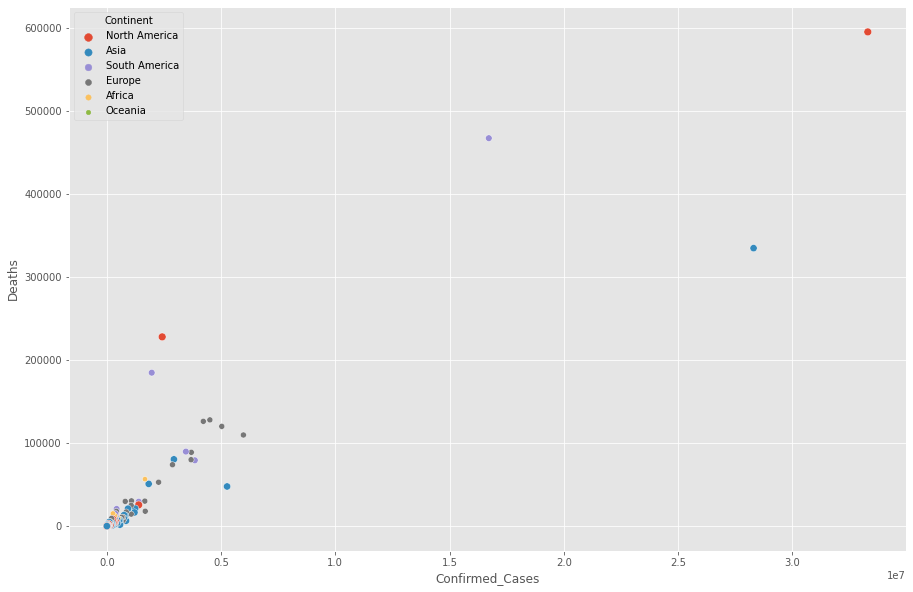

In [106]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df_continent, x="Confirmed_Cases", y="Deaths", hue="Continent", size="Continent",
    sizes=(20, 60), legend="full", ax = ax);

In [90]:
# customize the labels 
fig = px.scatter(df_continent, x='Confirmed_Cases', y='Deaths', color='Continent', size='Confirmed_Cases', size_max=60, 
                hover_name='Country/Region',log_x=True, log_y=True,color_discrete_sequence=["#cc9900","#fb5607","#ff006e","#8338ec","#1d4b94","#000814"],
                )
fig.show()

In [91]:
total_vaccination['daily_vaccinations'].sum()

1980068422.0

In [92]:
df_countries_daily

Date      Country/Region  ...  Month          Code
0     2020-01-22         Afghanistan  ...      1            AF
1     2020-01-22             Albania  ...      1            AL
2     2020-01-22             Algeria  ...      1            DZ
3     2020-01-22             Andorra  ...      1            AD
4     2020-01-22              Angola  ...      1            AO
...          ...                 ...  ...    ...           ...
96109 2021-06-02             Vietnam  ...      6  Unknown code
96110 2021-06-02  West Bank and Gaza  ...      6  Unknown code
96111 2021-06-02               Yemen  ...      6            YE
96112 2021-06-02              Zambia  ...      6            ZM
96113 2021-06-02            Zimbabwe  ...      6            ZW

[96114 rows x 8 columns]

In [93]:
df_countries_daily.sort_values('Confirmed_Cases',ascending=False).head(3)

Date Country/Region  Confirmed_Cases  ...  Year  Month          Code
96100 2021-06-02             US         33307008  ...  2021      6  Unknown code
95907 2021-06-01             US         33290450  ...  2021      6  Unknown code
95714 2021-05-31             US         33267507  ...  2021      5  Unknown code

[3 rows x 8 columns]

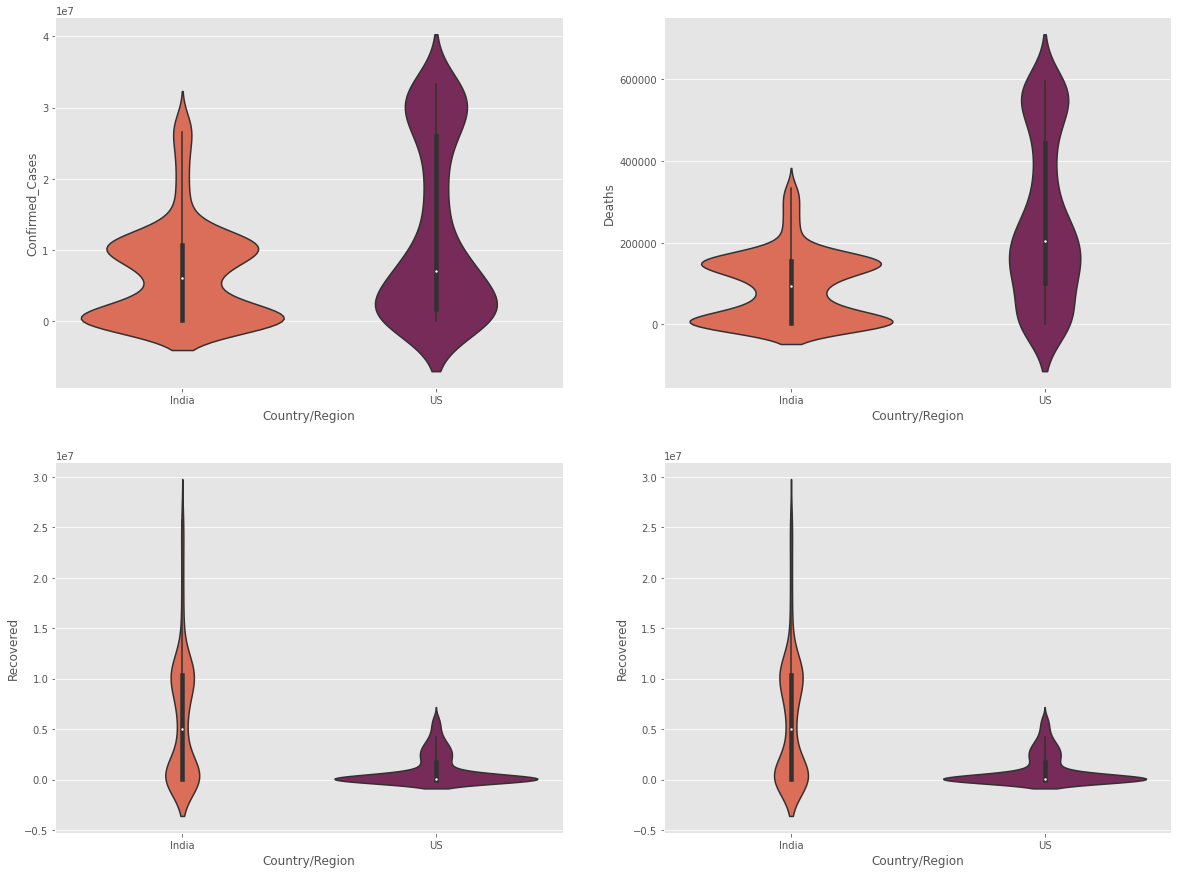

In [94]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'Country/Region', y = 'Confirmed_Cases', data = df_countries_daily[df_countries_daily['Country/Region'].isin(['US','India'])], palette="rocket_r")
plt.subplot(2,2,2)
sns.violinplot(x = 'Country/Region', y = 'Deaths', data = df_countries_daily[df_countries_daily['Country/Region'].isin(['US','India'])], palette="rocket_r")
plt.subplot(2,2,3)
sns.violinplot(x = 'Country/Region', y = 'Recovered', data = df_countries_daily[df_countries_daily['Country/Region'].isin(['US','India'])], palette="rocket_r")
plt.subplot(2,2,4)
sns.violinplot(x = 'Country/Region', y = 'Recovered', data = df_countries_daily[df_countries_daily['Country/Region'].isin(['US','India'])], palette="rocket_r")

In [95]:
covid_cases_top_10

Country/Region  Confirmed_Cases  Deaths  Recovered  Hospitalized
0              US         33307008  595825    6298082      26413101
1           India         28307832  335102   26179085       1793645
2          Brazil         16720081  467706   14763694       1488681
3          France          5978650  109841     392596       5476213
4          Turkey          5263697   47768    5131453         84476
5          Russia          5031583  120217    4648191        263175
6  United Kingdom          4510597  128057      15514       4367026
7           Italy          4223200  126283    3886867        210050
8       Argentina          3852156   79320    3409316        363520
9         Germany          3698004   88945    3518860         90199

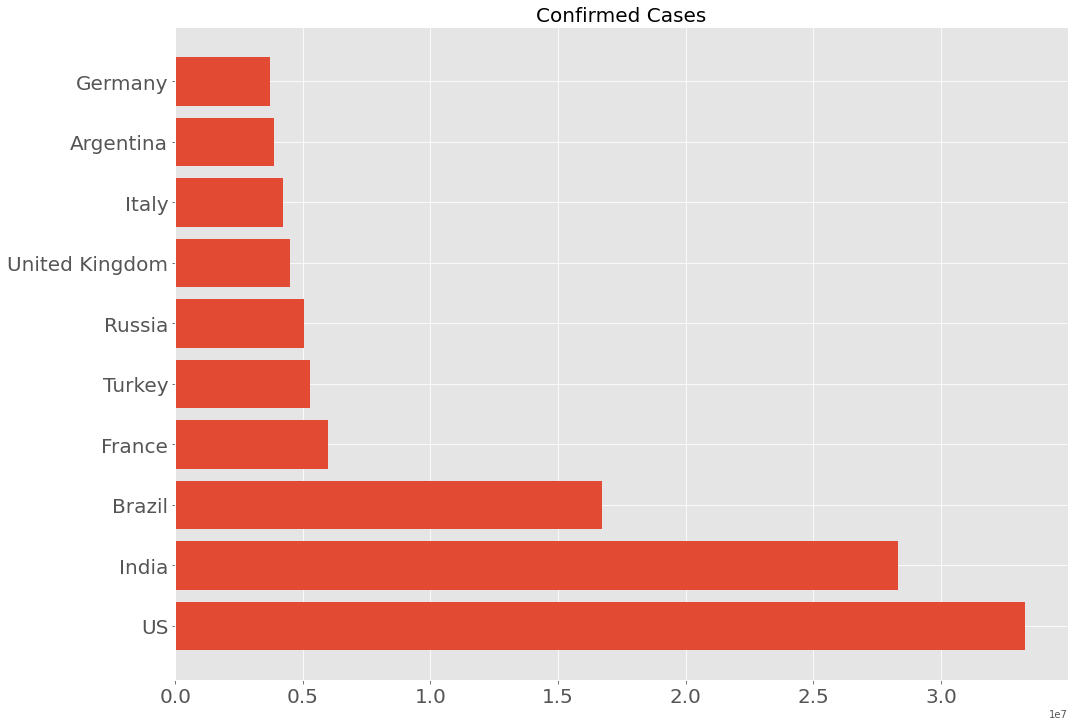

In [96]:
plt.figure(figsize=(16, 12))
plt.barh(covid_cases_top_10['Country/Region'].to_list(),covid_cases_top_10['Confirmed_Cases'].to_list())
plt.title('Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [97]:
df_us_daily

Date Country/Region  Confirmed_Cases  ...  Year  Month          Code
179   2020-01-22             US                1  ...  2020      1  Unknown code
372   2020-01-23             US                1  ...  2020      1  Unknown code
565   2020-01-24             US                2  ...  2020      1  Unknown code
758   2020-01-25             US                2  ...  2020      1  Unknown code
951   2020-01-26             US                5  ...  2020      1  Unknown code
...          ...            ...              ...  ...   ...    ...           ...
95328 2021-05-29             US         33254998  ...  2021      5  Unknown code
95521 2021-05-30             US         33261731  ...  2021      5  Unknown code
95714 2021-05-31             US         33267507  ...  2021      5  Unknown code
95907 2021-06-01             US         33290450  ...  2021      6  Unknown code
96100 2021-06-02             US         33307008  ...  2021      6  Unknown code

[498 rows x 8 columns]

In [98]:
from plotly.offline import iplot
import plotly.graph_objs as go

data = [
    go.Contour(
        z=[df_us_daily['Confirmed_Cases'].to_list(),
           df_us_daily['Deaths'].to_list(),
           df_us_daily['Recovered'].to_list()]
    )
]
iplot(data)